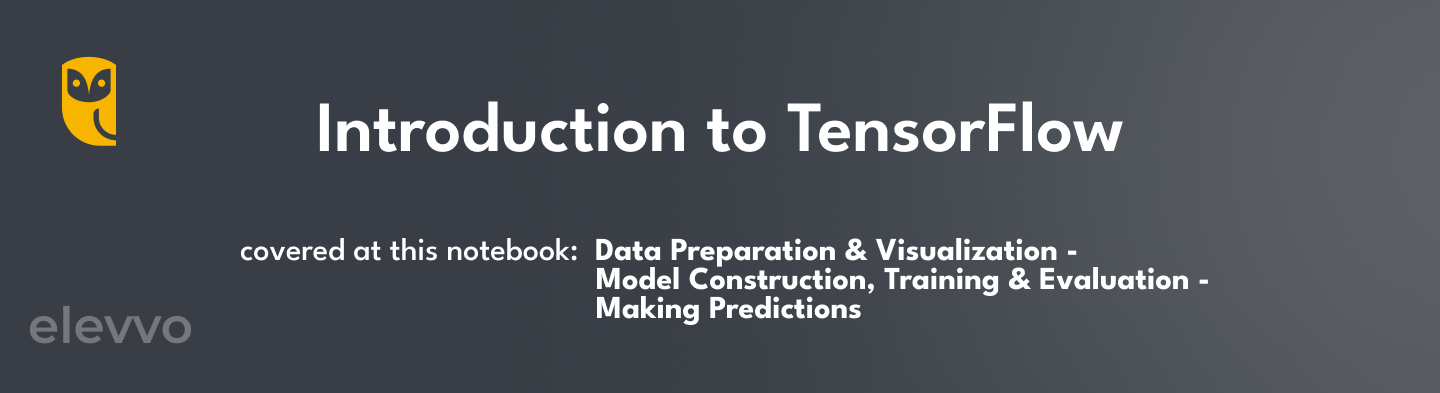

    What is TensorFlow ?

    📌 TensorFlow is an open-source framework for machine learning (ML) and artificial intelligence (AI).

    📌 It was designed to facilitate the development of machine learning models, particularly deep learning models, by providing tools to
    easily build, train, and deploy them across different platforms.

    📌 TensorFlow supports a wide range of applications, from natural language processing (NLP) and computer vision (CV) to time
    series forecasting and reinforcement learning.

    What about Keras ?

    📌 Keras is a high-level deep learning API that simplifies the process of building deep neural networks. Initially developed
    as an independent library.

    📌 Keras is now tightly integrated into TensorFlow as its official high-level API. It supports multiple backend engines,
    including TensorFlow,

    📌 Keras makes it easier to define, train, and evaluate deep learning models without requiring extensive knowledge of low-level operations.

📌 This short introduction uses Keras to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Set up TensorFlow

📌 Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Load a dataset
📌

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model
📌

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

📌 `Sequential`is useful for stacking layers where each layer has one input and one output.

📌 Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the `Flatten`, `Dense`, and `Dropout` layers.

📌 For each example, the model returns a vector of `logits` or `log-odds` scores, one for each class.



```
📌 Logits are the raw outputs of the last layer in a neural network
before applying the activation function, typically in the
context of classification problems. They represent the
unnormalized log probabilities of different classes.
```



In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.17094573, -0.07444198, -0.08941511, -0.4910992 , -0.37016708,
        -0.0429926 , -0.3606318 ,  0.61727357,  0.03595361,  0.32111144]],
      dtype=float32)

📌 The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.11568104, 0.09050898, 0.08916386, 0.05966775, 0.06733795,
        0.09340066, 0.06798311, 0.18075898, 0.10107316, 0.13442446]],
      dtype=float32)

📌 Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

📌 The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

📌 This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.3708568)

📌 Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

📌 Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8599 - loss: 0.4839
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9551 - loss: 0.1518
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9677 - loss: 0.1069
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9737 - loss: 0.0860
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9769 - loss: 0.0730


📌 The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9788 - loss: 0.0742


[0.07415895909070969, 0.9787999987602234]

📌 The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

📌 If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.6655442e-07, 2.0208230e-08, 2.2074933e-05, 5.0430663e-04,
        4.3829201e-11, 1.2637121e-07, 6.4913291e-14, 9.9941134e-01,
        1.9708264e-06, 5.9859514e-05],
       [2.1818503e-09, 3.2467788e-04, 9.9958974e-01, 3.5076584e-05,
        1.3351411e-16, 1.5619318e-06, 4.4962938e-08, 3.3037689e-12,
        4.8982722e-05, 1.8984319e-13],
       [1.1964788e-06, 9.9927717e-01, 2.1222592e-04, 3.9028178e-06,
        7.7829154e-06, 1.4359526e-06, 1.8500958e-05, 4.3216840e-04,
        4.4991531e-05, 6.1051787e-07],
       [9.9993360e-01, 3.3767517e-10, 1.1167598e-05, 1.9137153e-07,
        5.4675034e-08, 2.4561734e-06, 4.8411439e-05, 1.3879212e-07,
        7.8936246e-08, 4.0112354e-06],
       [1.0319374e-05, 1.6473754e-08, 4.3980017e-06, 4.0079158e-07,
        9.9352068e-01, 3.3266413e-06, 7.5846438e-06, 6.4612698e-04,
        7.3470760e-06, 5.7998318e-03]], dtype=float32)>

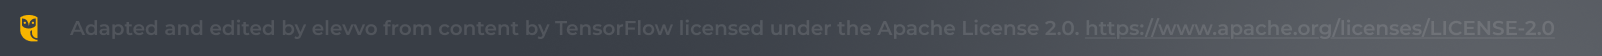